In [ ]:
from sklearn import datasets
import numpy as np
mnist = datasets.fetch_openml('mnist_784', version=1, return_X_y=True)
X, y = mnist
n = int(np.ceil(np.sqrt(X.shape[1])))

In [ ]:
from sklearn.decomposition import NMF
model = NMF(n_components=25, init='random', random_state=0)
W = model.fit_transform(X)
H = model.components_

In [ ]:

n1*n1

69696

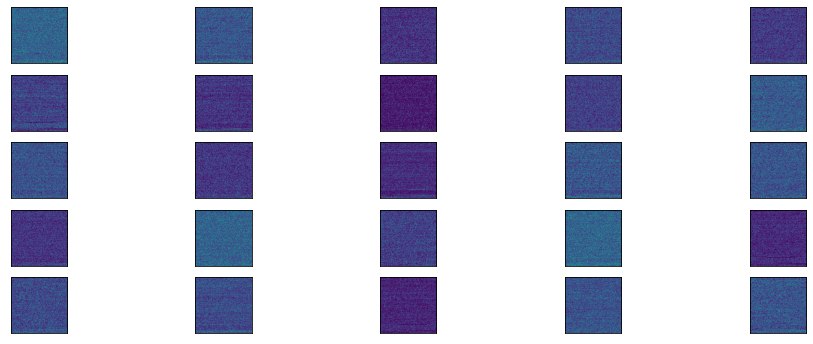

In [ ]:
n1 = int(np.floor(np.sqrt(X.shape[0])))
fig = plt.figure(figsize=(16, 6))
for i in range(25):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(W[:69696,i].reshape(n1,n1))

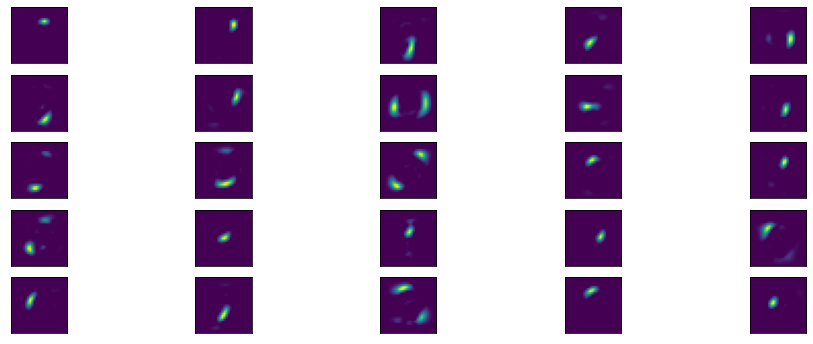

In [ ]:

fig = plt.figure(figsize=(16, 6))
for i in range(25):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(H[i,:].reshape(n,n))

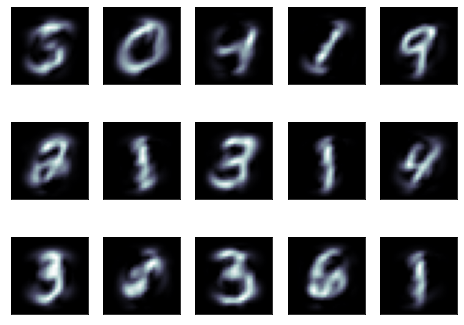

In [ ]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(s[i].reshape(n,n), cmap=plt.cm.bone)

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=24, whiten=True)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=24, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)

4096

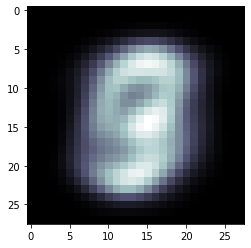

In [ ]:
plt.imshow(pca.mean_.reshape(n,n),
           cmap=plt.cm.bone)

In [ ]:
pca.components_.shape

(24, 784)

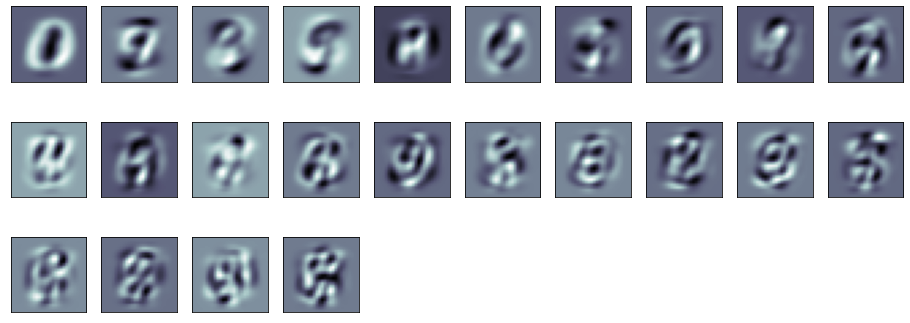

In [ ]:
fig = plt.figure(figsize=(16, 6))
for i in range(24):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(n,n),
              cmap=plt.cm.bone)

Reference:https://github.com/ahmadvh/Non-Negative-Matrix-factorization---Implemented-in-python/blob/master/The%20notebook.ipynb
https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_eigenfaces.html

In [6]:
import numpy as np
def random_initialization(A,rank):
    number_of_images = A.shape[0]
    number_of_terms = A.shape[1]
    W = np.random.uniform(1,2,(number_of_images,rank))
    H = np.random.uniform(1,2,(rank,number_of_terms))
    return W,H
                          

def nndsvd_initialization(A,rank):
    u,s,v=np.linalg.svd(A,full_matrices=False)
    v=v.T
    w=np.zeros((A.shape[0],rank))
    h=np.zeros((rank,A.shape[1]))

    w[:,0]=np.sqrt(s[0])*np.abs(u[:,0])
    h[0,:]=np.sqrt(s[0])*np.abs(v[:,0].T)

    for i in range(1,rank):
        
        ui=u[:,i]
        vi=v[:,i]
        ui_pos=(ui>=0)*ui
        ui_neg=(ui<0)*-ui
        vi_pos=(vi>=0)*vi
        vi_neg=(vi<0)*-vi
        
        ui_pos_norm=np.linalg.norm(ui_pos,2)
        ui_neg_norm=np.linalg.norm(ui_neg,2)
        vi_pos_norm=np.linalg.norm(vi_pos,2)
        vi_neg_norm=np.linalg.norm(vi_neg,2)
        
        norm_pos=ui_pos_norm*vi_pos_norm
        norm_neg=ui_neg_norm*vi_neg_norm
        
        if norm_pos>=norm_neg:
            w[:,i]=np.sqrt(s[i]*norm_pos)/ui_pos_norm*ui_pos
            h[i,:]=np.sqrt(s[i]*norm_pos)/vi_pos_norm*vi_pos.T
        else:
            w[:,i]=np.sqrt(s[i]*norm_neg)/ui_neg_norm*ui_neg
            h[i,:]=np.sqrt(s[i]*norm_neg)/vi_neg_norm*vi_neg.T

    return w,h
def mu_method(A,k,max_iter,init_mode='random'):
    
    if init_mode == 'random':
        W ,H = random_initialization(A,k)
    elif init_mode == 'nndsvd':
        W ,H = nndsvd_initialization(A,k) 
    norms = []
    e = 1.0e-10
    for n in range(max_iter):
        # Update H
        W_TA = W.T@A
        W_TWH = W.T@W@H+e
        for i in range(np.size(H, 0)):
            for j in range(np.size(H, 1)):
                H[i, j] = H[i, j] * W_TA[i, j] / W_TWH[i, j]
        # Update W
        AH_T = A@H.T
        WHH_T =  W@H@H.T+ e

        for i in range(np.size(W, 0)):
            for j in range(np.size(W, 1)):
                W[i, j] = W[i, j] * AH_T[i, j] / WHH_T[i, j]

        norm = np.linalg.norm(A - W@H, 'fro')
        norms.append(norm)
    return W ,H ,norms

In [3]:
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
faces.data.shape


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


(400, 4096)

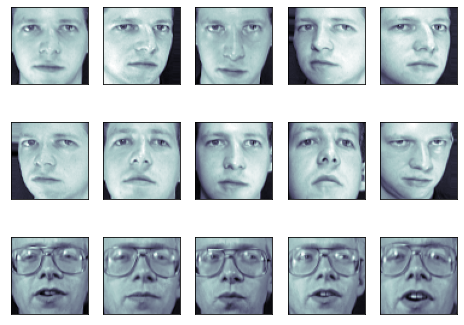

In [ ]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data,
        faces.target, random_state=0)

print(X_train.shape, X_test.shape)

(300, 4096) (100, 4096)


In [16]:
norms=[0,0,0,0,0]
for i in range(5):
  W ,H ,norms[i] =mu_method(X_train,5*(i+1),100)

In [14]:
n1 = int(np.floor(np.sqrt(300)))
n1*n1

289

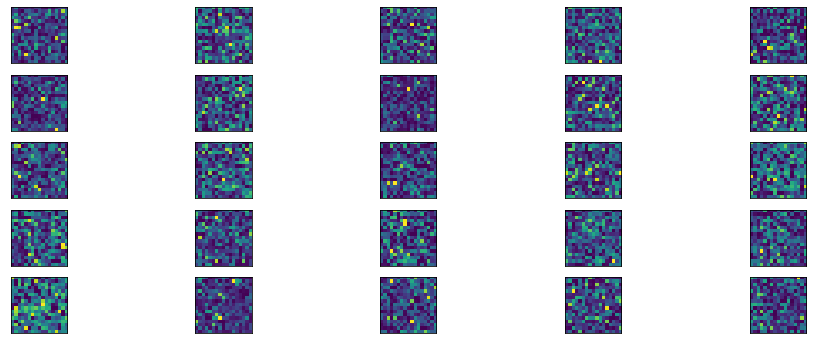

In [15]:
n1 = int(np.floor(np.sqrt(300)))
fig = plt.figure(figsize=(16, 6))
for i in range(25):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(W[:289,i].reshape(n1,n1))

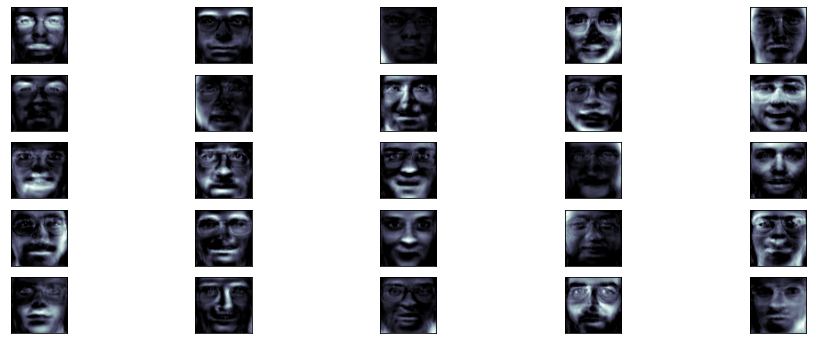

In [ ]:
fig = plt.figure(figsize=(16, 6))
for i in range(25):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(H[i,:].reshape(faces.images[i].shape), cmap=plt.cm.bone)

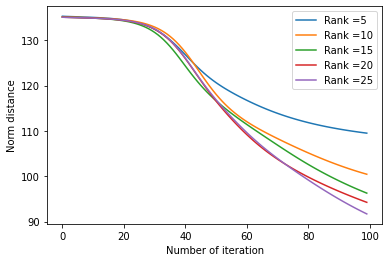

In [20]:
from matplotlib import pyplot as plt

plt.xlabel('Number of iteration')
plt.ylabel('Norm distance')

plt.plot(norms[0], label ="Rank =5")
plt.plot(norms[1], label ="Rank =10")
plt.plot(norms[2], label ="Rank =15")
plt.plot(norms[3], label ="Rank =20")
plt.plot(norms[4], label ="Rank =25")

plt.legend()
plt.show()